In [1]:
%matplotlib inline 
import pandas as pd
from datetime import datetime, timedelta
from pandas import Series, DataFrame
import numpy as np
import matplotlib as mpl
from itertools import chain
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
df_data = pd.read_csv('Weatherdataset.csv', encoding='utf-8')

 The following line returns the first 5 rows of the dataset

In [ ]:
df_data.head()

Details of df_data data frame are

In [ ]:
df_data.info()

Number of rows and number of columns:

In [ ]:
rows = df_data.shape[0]
columns = df_data.shape[1]
print("number of rows and number of columns respectively:" + str(rows) + ", " + str(columns))

Descriptive details of 'Wind Direction' column are:

In [ ]:
df_data['Wind Direction'].describe()

The average outside temp for each day:

In [ ]:
df_data.groupby('Date', as_index=False)['Outside Temperature'].mean()


The average outside temp for each week

In [ ]:
df_data['Date'] = pd.to_datetime(df_data['Date'], infer_datetime_format=True)
df = df_data.resample('W', on='Date')['Outside Temperature'].mean()
print(df)

Maximum temperature difference each day for all the days of the months:

In [ ]:
df_data.groupby('Date')['Outside Temperature'].max() - df_data.groupby('Date')['Outside Temperature'].min()

Minium temperature difference each day for all the days of the months:

In [ ]:
df_data['datetime'] = pd.to_datetime(df_data['Date'].astype(str) + ' ' + df_data['Time'])
# sort by datetime
df_data = df_data.sort_values('datetime')
# group by date and get minimum absolute difference between consecutive outside temps
def min_diff(group):
    return group['Outside Temperature'].diff().abs().min()
result = df_data.groupby('Date').apply(min_diff).reset_index(name='Min Temp Diff')
print("min outside Temp diff each day")
print(result)


The unique values for each column are:

In [ ]:
for col in df_data:
    print(f'{col}: {df_data[col].unique()}' + "\n")

The average time of hottest daily temperature (over month)

In [ ]:
idx = df_data.groupby(['Date'])['Outside Temperature'].transform(max) == df_data['Outside Temperature']
new_df = df_data[idx]
def time_to_seconds(t):
    dt = datetime.strptime(t, "%H:%M")
    return dt.hour * 3600 + dt.minute * 60 + dt.second

new_df['seconds'] = new_df['Time'].apply(time_to_seconds)
# compute the average time in seconds
mean_seconds = new_df['seconds'].mean()
# convert back to hh:mm:ss
avg_time = str(timedelta(seconds=int(mean_seconds)))
avg_hottest_time = avg_time
# save to file
with open("outside_temperature.txt", "a") as f:
    f.writelines(avg_hottest_time)


The time of the day that is the most commonly occurring hottest time

In [ ]:
idx = df_data.groupby(['Date'])['Outside Temperature'].transform(max) == df_data['Outside Temperature']
new_df = df_data[idx]
mode = new_df['Time'].value_counts().idxmax()
f = open("outside_temperature.txt", "a")
f.write("\n most frequent hottest time" + mode)
f.close()


The top ten hottest times on distinct days, sorted by date order

In [ ]:
idx = df_data.groupby(['Date'])['Outside Temperature'].transform(max) == df_data['Outside Temperature']
new_df = df_data[idx]
sorted_df = new_df.sort_values(by=['Outside Temperature'])
top_10_df= sorted_df.tail(10)
top_10_df['datetime'] = pd.to_datetime(top_10_df['Date'],dayfirst=True)
sorted_top_10_df = top_10_df.sort_values(by=['datetime'])
#print(sorted_top_10_df)
f = open("outside_temperature.txt", "a")
f.writelines(['\n', str(sorted_top_10_df['Date']), ' ', str(sorted_top_10_df['Time']), ' ', str(sorted_top_10_df['Outside Temperature'])])
f.close()

All of the Dates and Times where the “Hi Temperature” was within +/- 1 degree of 22.3 OR the “Low Temperature” was within +/- 0.2 degree higher OR lower of 10.3 over the first 9 days of June

In [ ]:
f1 = open("Hi_Temperature.txt", "a")
df_data['datetime'] = pd.to_datetime(df_data['Date'],dayfirst=True)
filtered_df = df_data.loc[(df_data['datetime'] >= '2006-06-01')& (df_data['datetime'] < '2006-06-10')]
result_df = filtered_df[(filtered_df['Hi Temperature'] >= 21.3) & (filtered_df['Hi Temperature'] <= 23.3) | (filtered_df['Low Temperature'] >= 10.1) & (filtered_df['Low Temperature'] <= 10.5) ]
f1.writelines(['\n', str(result_df['Date']), ' ', str(result_df['Time'])])
f1.close()
#print(result_df)

Visulalize the temperature for each month

In [ ]:
df_data['Date'] = pd.to_datetime(df_data['Date'], dayfirst=True)
monthly_avg = df_data.resample('M', on='Date')['Outside Temperature'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o')

plt.xticks(ticks=monthly_avg.index, labels=monthly_avg.index.strftime('%b %Y'), rotation=45)

plt.title('Average outside temperature per month')
plt.xlabel('Month')
plt.ylabel('Average temperature')
plt.tight_layout()
plt.show()

Display the time period on a bar plot which has highest temperature for the first 5 days of every month

In [ ]:
# get first 5 days of each month with at least 5 days of data
df_data['Date'] = pd.to_datetime(df_data['Date'], dayfirst=True)
df_data['Day'] = df_data['Date'].dt.day
df_data['Month'] = df_data['Date'].dt.to_period('M')

# keep only months that have 5 or more distinct days ≤ 5
valid_months = df_data[df_data['Day'] <= 5].groupby('Month')['Day'].nunique()
valid_months = valid_months[valid_months >= 5].index

# filter data to only those valid months and first 5 days
filtered = df_data[
    (df_data['Month'].isin(valid_months)) & (df_data['Day'] <= 5)
]

# group by month and compute average
monthly_avg = filtered.groupby('Month')['Outside Temperature'].mean().reset_index()
monthly_avg['Month'] = monthly_avg['Month'].astype(str)

plt.figure(figsize=(8, 5))
sns.barplot(x='Month', y='Outside Temperature', data=monthly_avg)
plt.title('Avg Temperature for First 5 Days of Each Month')
plt.xlabel('Month')
plt.ylabel('Avg Temperature')
plt.tight_layout()
plt.show()

Finding out an 'interesting' information from the data set.

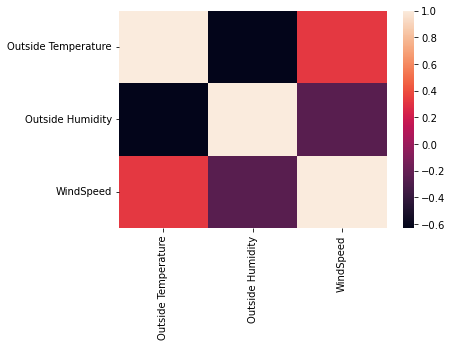

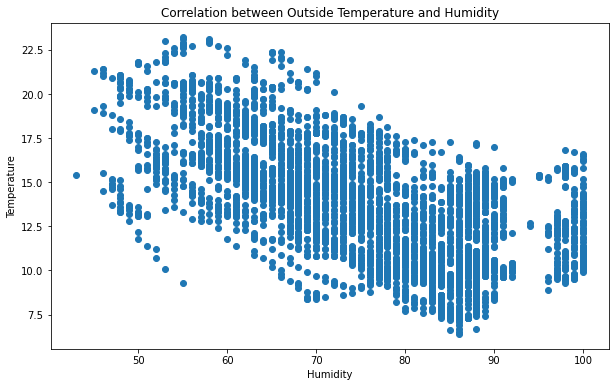

In [19]:
df = df_data[['Date', 'Time','Outside Temperature','Outside Humidity','WindSpeed']]

temp = df['Outside Temperature'].tolist()
hum = df['Outside Humidity'].tolist()
wind = df['WindSpeed'].tolist()
# First visualization (correlation heatmap) between selected attributes (Wind speed, outside temperature, and outside humidity)
# the picture shows a clear correlation between humidity and temperature
sns.heatmap(df.corr())
plt.show()
# second visualization plots the positive correlation relationship between humidity and temperature
fig = plt.figure()
fig.set_size_inches(10, 6)
plt.scatter(hum, temp)
plt.title('Correlation between Outside Temperature and Humidity')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()